#Import

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install rasterio

In [5]:
import glob
import os
import rasterio
from rasterio.plot import show

# Load Rasters

In [6]:
dirpath = '/content/drive/My Drive/CS_229_project/img_data/Prediction'
search = '*.tif'
dem_fps = glob.glob(os.path.join(dirpath, search))
dem_fps.sort()
dem_fps

['/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174745_37_2212_3B_Visual.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174747_58_2212_3B_Visual.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174749_79_2212_3B_Visual_clip.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174752_00_2212_3B_Visual_clip.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175435_29_2277_3B_Visual.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175437_48_2277_3B_Visual.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175439_68_2277_3B_Visual_clip.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175441_87_2277_3B_Visual_clip.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175444_07_2277_3B_Visual_clip.tif',
 '/content/drive/My Drive/CS_229_project/img_data/Prediction/20200

In [7]:
src_files_to_mosaic = []
for fp in dem_fps:
  src = rasterio.open(fp)
  src_files_to_mosaic.append(src)

In [8]:
src_files_to_mosaic

[<open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174745_37_2212_3B_Visual.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174747_58_2212_3B_Visual.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174749_79_2212_3B_Visual_clip.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_174752_00_2212_3B_Visual_clip.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175435_29_2277_3B_Visual.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175437_48_2277_3B_Visual.tif' mode='r'>,
 <open DatasetReader name='/content/drive/My Drive/CS_229_project/img_data/Prediction/20200926_175439_68_2277_3B_Visual_clip.tif' mode='r'>,
 <open DatasetReader name='/conte

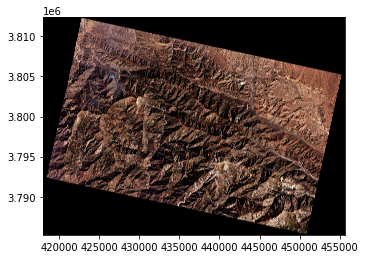

In [9]:
show(src_files_to_mosaic[1], cmap='terrain')

# Make Mosaic

In [11]:
from rasterio.merge import merge
mosaic, out_trans = merge(src_files_to_mosaic)

In [12]:
# Make the output template
out_meta = src_files_to_mosaic[1].meta.copy()
out_meta.update({"driver": "GTiff",
                   "height": mosaic.shape[1],
                    "width": mosaic.shape[2],
                    "transform": out_trans,
                    "crs": "+proj=utm +zone=11 +ellps=GRS80 +units=m +no_defs "})

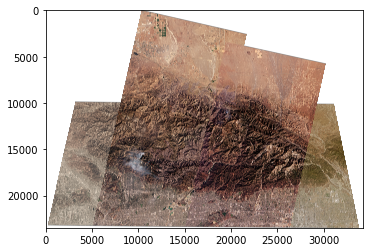

In [13]:
from gc import collect
del src_files_to_mosaic
collect()
show(mosaic, cmap='terrain')

In [16]:
with rasterio.open(dirpath + "_mosaic.tif", "w", **out_meta) as dest:
  dest.write(mosaic)

# Clip Mosaic

In [18]:
!pip install fiona

In [57]:
import fiona
import rasterio.mask
with fiona.open("/content/drive/My Drive/CS_229_project/img_data/clip/pred_grid_1.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [58]:
len(shapes)

58

In [59]:
mosaic = rasterio.open('/content/drive/My Drive/CS_229_project/img_data/Prediction_mosaic.tif')

In [60]:
pred_clipped = '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped'

In [69]:
from rasterio.plot import reshape_as_raster, reshape_as_image
from PIL import Image
for i in range(0, len(shapes)):
  out_image, out_transform = rasterio.mask.mask(mosaic, [shapes[i]], crop = True)
  im = Image.fromarray(reshape_as_image(out_image[0:3]), "RGB")
  im = im.resize((224, 224), Image.ANTIALIAS)
  name = str(i) + '.jpg'
  im.save(os.path.join(pred_clipped, name), 'JPEG')

In [70]:
import glob
import os
search = '*.jpg'
dem_fps = glob.glob(os.path.join(pred_clipped, search))
dem_fps

['/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/0.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/1.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/2.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/3.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/4.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/5.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/6.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/7.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/8.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/9.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/10.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/11.jpg',
 '/content/drive/My Drive/CS_229_project/img_data/prediction_clipped/12.jp

In [63]:
from tensorflow import keras
import numpy as np
def convert_directory_to_arrays(list):
  n_images = len(dem_fps)
  df_array = np.zeros((n_images, 224, 224, 3))
  i = 0
  n_fail = 0
  for idx in dem_fps:
    try:
      img = keras.preprocessing.image.load_img(idx)
      img = keras.preprocessing.image.img_to_array(img)
      df_array[i] = img
      i += 1
    except:
      print("Image not found: " + idx)
      n_fail += 1

  print("Total failures:" + str(n_fail))
  df_array = df_array[0:n_images - n_fail]
  return df_array

In [71]:
x_pred = convert_directory_to_arrays(dem_fps)

Total failures:0


In [72]:
x_pred.shape

(58, 224, 224, 3)

In [74]:
project_root_dir = '/content/drive/My Drive/CS_229_project/'
experiments_dir = os.path.join(project_root_dir, 'experiments')
np.save(os.path.join(experiments_dir, 'x_pred.npy'), x_pred)